In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
df1 = pd.read_csv('fifa21_m1.csv')

In [12]:
df1.shape
# Some columns were dropped in google sheets

(17125, 101)

In [13]:
df1.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'POT',
       ...
       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object', length=101)

In [14]:
df1.columns = [column.lower().replace(' ', '_') for column in df1.columns]

In [15]:
df1 = df1.set_index('name')
#Sets name as index for easier exploitation of results

In [16]:
df1.shape

(17125, 100)

In [17]:
df1.columns

Index(['id', 'age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position',
       'pot', 'height', 'weight', 'foot', 'growth', 'joined', 'value', 'wage',
       'release_clause', 'contract', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam'

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17125 entries, G. Pasquale to Pablo Rodríguez
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17125 non-null  int64  
 1   age               17125 non-null  int64  
 2   ova               17125 non-null  int64  
 3   nationality       17125 non-null  object 
 4   club              17102 non-null  object 
 5   bov               17125 non-null  int64  
 6   bp                17125 non-null  object 
 7   position          16712 non-null  object 
 8   pot               17125 non-null  int64  
 9   height            17125 non-null  object 
 10  weight            17125 non-null  object 
 11  foot              17125 non-null  object 
 12  growth            17125 non-null  int64  
 13  joined            17067 non-null  object 
 14  value             17125 non-null  object 
 15  wage              17125 non-null  object 
 16  release_clause    17125 

### Safety copy:

In [19]:
df2 = df1.copy()

In [20]:
#df2.isna().sum()

In [21]:
# Converts weight to number:
df2['weight'] = df2['weight'].apply(lambda x: float(str(x).replace('lbs', '')))
df2['weight'].dtypes #fine

dtype('float64')

In [22]:
df2['weight'] = df2['weight']*0.453592
df2['weight'] = df2['weight'].round()
df2['weight']

name
G. Pasquale        82.0
Luis García        65.0
J. Cole            73.0
D. Yorke           75.0
Iniesta            68.0
                   ... 
A. Medioub         75.0
W. Rickard         77.0
C. Barrett         70.0
J. Gazibegović     67.0
Pablo Rodríguez    70.0
Name: weight, Length: 17125, dtype: float64

In [23]:
# Convert height:
import re

In [24]:
def convert_to_cm(x):
    values = re.findall(r'\d+', x) 
    ft = int(values[0])
    try:
        inches = int(values[1])
    except IndexError:
        inches = 0
    return (ft * 12 + inches)*2.54
df2['height'] = df2['height'].apply(convert_to_cm).round()

In [25]:
df2['height']

name
G. Pasquale        183.0
Luis García        178.0
J. Cole            175.0
D. Yorke           180.0
Iniesta            170.0
                   ...  
A. Medioub         198.0
W. Rickard         178.0
C. Barrett         175.0
J. Gazibegović     175.0
Pablo Rodríguez    178.0
Name: height, Length: 17125, dtype: float64

In [26]:
df2.head()

id  age  ova            nationality           club  bov   bp  \
name                                                                        
G. Pasquale   2   33   69                  Italy        Udinese   71  LWB   
Luis García  16   37   71                  Spain      KAS Eupen   70   CM   
J. Cole      27   33   71                England  Coventry City   71  CAM   
D. Yorke     36   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
Iniesta      41   36   81                  Spain    Vissel Kobe   82  CAM   

                 position  pot  height  weight   foot  growth        joined  \
name                                                                          
G. Pasquale            LM   69   183.0    82.0   Left       0   Jul 1, 2008   
Luis García    CM CAM CDM   71   178.0    65.0  Right       0  Jul 19, 2014   
J. Cole      CAM RM RW LM   71   175.0    73.0  Right       0   Jan 7, 2016   
D. Yorke              NaN   82   180.0    75.0  Right      14           NaN   
Iniesta            CM CAM   81   170.0    68.0  Right       0  Jul 16, 2018   

             value  wage release_clause     contract  attacking  crossing  \
name                                                                        
G. Pasquale  €625K   €7K             €0  2008 ~ 2016        313        75   
Luis García  €600K   €7K          €1.1M  2014 ~ 2019        337        68   
J. Cole      €1.1M  €15K             €0  2016 ~ 2020        337        80   
D. Yorke        €0    €0             €0         2009        264        54   
Iniesta      €5.5M  €12K          €7.2M  2018 ~ 2021        367        75   

             finishing  heading_accuracy  short_passing  volleys  skill  \
name                                                                      
G. Pasquale         50                59             71     58.0    338   
Luis García         64                61             76     68.0    369   
J. Cole             64                41             77     75.0    387   
D. Yorke            70                60             80      NaN    255   
Iniesta             69                54             90     79.0    408   

             dribbling  curve  fk_accuracy  long_passing  ball_control  \
name                                                                     
G. Pasquale         73   65.0           60            69            71   
Luis García         69   79.0           79            71            71   
J. Cole             79   84.0           77            69            78   
D. Yorke            68    NaN           46            64            77   
Iniesta             85   80.0           70            83            90   

             movement  acceleration  sprint_speed  agility  reactions  \
name                                                                    
G. Pasquale       347            68            74     68.0         69   
Luis García       305            56            50     62.0         65   
J. Cole           295            48            42     71.0         59   
D. Yorke          176            59            62      NaN         55   
Iniesta           346            61            56     79.0         75   

             balance  power  shot_power  jumping  stamina  strength  \
name                                                                  
G. Pasquale     68.0    347          74     68.0       69        68   
Luis García     72.0    324          75     54.0       64        60   
J. Cole         75.0    284          72     58.0       29        56   
D. Yorke         NaN    239          63      NaN       51        66   
Iniesta         75.0    297          67     40.0       58        62   

             long_shots  mentality  aggression  interceptions  positioning  \
name                                                                         
G. Pasquale          68        320          72           69.0         63.0   
Luis García          71        362          71           71.0         72.0   
J. Cole     

### Let's deal with da money

In [27]:
#df2['wage'].to_string()

In [28]:
# Removing € symbol:
def clean_currency(x):
    # If the value is a string, then remove currency symbol and delimiters
    # otherwise, the value is numeric and can be converted
    if isinstance(x, str):
        return(x.replace('€', '').replace(',', ''))
    return(x)
df2['wage'] = df2['wage'].apply(clean_currency)

In [29]:
# Converting K and M to numbers
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        #return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        #return 1000000.0
    else:
        return (x)
df2['wage'] = df2['wage'].apply(value_to_float)

In [30]:
df2['wage'] = pd.to_numeric(df2['wage'])
df2['wage'].dtypes

dtype('float64')

In [31]:
df2['value'] = df2['value'].apply(clean_currency)

In [32]:
df2['value'] = df2['value'].apply(value_to_float)

In [33]:
df2['value'] = pd.to_numeric(df2['value'])
df2['value'].dtypes

dtype('float64')

In [34]:
df2['release_clause'] = df2['release_clause'].apply(clean_currency)

In [35]:
df2['release_clause'] = df2['release_clause'].apply(value_to_float)

In [36]:
df2['release_clause'] = pd.to_numeric(df2['release_clause'])
df2['release_clause'].dtypes

dtype('float64')

In [37]:
#pd.set_option('display.max_rows', None)

In [38]:
df2

id  age  ova            nationality           club  bov  \
name                                                                           
G. Pasquale           2   33   69                  Italy        Udinese   71   
Luis García          16   37   71                  Spain      KAS Eupen   70   
J. Cole              27   33   71                England  Coventry City   71   
D. Yorke             36   36   68  Trinidad &amp; Tobago     Sunderland   70   
Iniesta              41   36   81                  Spain    Vissel Kobe   82   
...                 ...  ...  ...                    ...            ...  ...   
A. Medioub       259088   22   64                 France     CD Tondela   66   
W. Rickard       259090   18   56                  Wales        Burnley   58   
C. Barrett       259091   18   56                England        Burnley   56   
J. Gazibegović   259101   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
Pablo Rodríguez  259105   18   59                  Spain          Lecce   61   

                  bp      position  pot  height  weight   foot  growth  \
name                                                                     
G. Pasquale      LWB            LM   69   183.0    82.0   Left       0   
Luis García       CM    CM CAM CDM   71   178.0    65.0  Right       0   
J. Cole          CAM  CAM RM RW LM   71   175.0    73.0  Right       0   
D. Yorke          ST           NaN   82   180.0    75.0  Right      14   
Iniesta          CAM        CM CAM   81   170.0    68.0  Right       0   
...              ...           ...  ...     ...     ...    ...     ...   
A. Medioub        CB            CB   69   198.0    75.0  Right       5   
W. Rickard       CAM        CAM CM   66   178.0    77.0  Right      10   
C. Barrett        RB            RB   67   175.0    70.0  Right      11   
J. Gazibegović    RB         RB LB   73   175.0    67.0  Right      11   
Pablo Rodríguez   ST            ST   74   178.0    70.0  Right      15   

                       joined      value     wage  release_clause  \
name                                                                
G. Pasquale       Jul 1, 2008   625000.0   7000.0             0.0   
Luis García      Jul 19, 2014   600000.0   7000.0       1100000.0   
J. Cole           Jan 7, 2016  1100000.0  15000.0             0.0   
D. Yorke                  NaN        0.0      0.0             0.0   
Iniesta          Jul 16, 2018  5500000.0  12000.0       7200000.0   
...                       ...        ...      ...             ...   
A. Medioub       Sep 29, 2020   550000.0   2000.0             0.0   
W. Rickard       Aug 20, 2020   130000.0   3000.0        273000.0   
C. Barrett       Aug 20, 2020   130000.0   2000.0        273000.0   
J. Gazibegović   Sep 30, 2020   475000.0   3000.0        784000.0   
Pablo Rodríguez  Sep 30, 2020   325000.0   2000.0        788000.0   

                             contract  attacking  crossing  finishing  \
name                                                                    
G. Pasquale               2008 ~ 2016        313        75         50   
Luis García               2014 ~ 2019        337        68         64   
J. Cole                   2016 ~ 2020        337        80         64   
D. Yorke                         2009        264        54         70   
Iniesta                   2018 ~ 2021        367        75         69   
...                               ...        ...       ...        ...   
A. Medioub       Jun 30, 2021 On Loan        197        35         23   
W. Rickard                2020 ~ 2021        248        50         43   
C. Barrett                2020 ~ 2022        218        55         34   
J. Gazibegović            2020 ~ 2023        223        62         26   
Pablo Rodríguez           2020 ~ 2024        254        32         64   

                 heading_accuracy  short_passing  volleys  skill  dribbling  \
name                                                                          
G. Pasquale

In [39]:
df2['w/f'].unique()

array(['3 ★', '4 ★', '2 ★', '1 ★', '5 ★'], dtype=object)

In [40]:
#converting to string
df2['w/f'].to_string()
#removing ★
df2['w/f'] = df2['w/f'].str.replace('★','')

In [41]:
df2['w/f'].unique()

array(['3 ', '4 ', '2 ', '1 ', '5 '], dtype=object)

In [42]:
#converting to string
df2['sm'].to_string()
#removing ★
df2['sm'] = df2['sm'].str.replace('★','')
df2['sm'].unique()

array(['2', '3', '4', '1', '5'], dtype=object)

In [43]:
#converting to string
df2['ir'].to_string()
#removing %
df2['ir'] = df2['ir'].str.replace('★','')
df2['ir'].unique()

array(['2 ', '1 ', '4 ', '3 ', '5 '], dtype=object)

### Another safety copy

In [44]:
df3 = df2.copy()
df3.head()

id  age  ova            nationality           club  bov   bp  \
name                                                                        
G. Pasquale   2   33   69                  Italy        Udinese   71  LWB   
Luis García  16   37   71                  Spain      KAS Eupen   70   CM   
J. Cole      27   33   71                England  Coventry City   71  CAM   
D. Yorke     36   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
Iniesta      41   36   81                  Spain    Vissel Kobe   82  CAM   

                 position  pot  height  weight   foot  growth        joined  \
name                                                                          
G. Pasquale            LM   69   183.0    82.0   Left       0   Jul 1, 2008   
Luis García    CM CAM CDM   71   178.0    65.0  Right       0  Jul 19, 2014   
J. Cole      CAM RM RW LM   71   175.0    73.0  Right       0   Jan 7, 2016   
D. Yorke              NaN   82   180.0    75.0  Right      14           NaN   
Iniesta            CM CAM   81   170.0    68.0  Right       0  Jul 16, 2018   

                 value     wage  release_clause     contract  attacking  \
name                                                                      
G. Pasquale   625000.0   7000.0             0.0  2008 ~ 2016        313   
Luis García   600000.0   7000.0       1100000.0  2014 ~ 2019        337   
J. Cole      1100000.0  15000.0             0.0  2016 ~ 2020        337   
D. Yorke           0.0      0.0             0.0         2009        264   
Iniesta      5500000.0  12000.0       7200000.0  2018 ~ 2021        367   

             crossing  finishing  heading_accuracy  short_passing  volleys  \
name                                                                         
G. Pasquale        75         50                59             71     58.0   
Luis García        68         64                61             76     68.0   
J. Cole            80         64                41             77     75.0   
D. Yorke           54         70                60             80      NaN   
Iniesta            75         69                54             90     79.0   

             skill  dribbling  curve  fk_accuracy  long_passing  ball_control  \
name                                                                            
G. Pasquale    338         73   65.0           60            69            71   
Luis García    369         69   79.0           79            71            71   
J. Cole        387         79   84.0           77            69            78   
D. Yorke       255         68    NaN           46            64            77   
Iniesta        408         85   80.0           70            83            90   

             movement  acceleration  sprint_speed  agility  reactions  \
name                                                                    
G. Pasquale       347            68            74     68.0         69   
Luis García       305            56            50     62.0         65   
J. Cole           295            48            42     71.0         59   
D. Yorke          176            59            62      NaN         55   
Iniesta           346            61            56     79.0         75   

             balance  power  shot_power  jumping  stamina  strength  \
name                                                                  
G. Pasquale     68.0    347          74     68.0       69        68   
Luis García     72.0    324          75     54.0       64        60   
J. Cole         75.0    284          72     58.0       29        56   
D. Yorke         NaN    239          63      NaN       51        66   
Iniesta         75.0    297          67     40.0       58        62   

             long_shots  mentality  aggression  interceptions  positioning  \
name                                                                         
G. Pasquale          68        320          72           69.0         63.0   
Luis García          71        362

In [45]:
df3['hits'] = df3['hits'].apply(value_to_float)
#There were some K in it

In [46]:
#df3['hits'].unique() #Fine

In [47]:
def get_characteristics(x):
    values = re.findall(r'\d+', x) 
    main = int(values[0])
    bonus = int(values[1])
    sign = re.findall(r'\D+', x)
    if sign == '+':
        return main + bonus
    else:   #for +- sign:                     
        return main - bonus
df3['rb'] = df3['rb'].apply(get_characteristics)

In [48]:
df3['ls'] = df3['ls'].apply(get_characteristics)

In [49]:
df3['st'] = df3['st'].apply(get_characteristics)

In [50]:
df3['rs'] = df3['rs'].apply(get_characteristics)

In [51]:
df3['lw'] = df3['lw'].apply(get_characteristics)

In [52]:
df3['lf'] = df3['lf'].apply(get_characteristics)

In [53]:
df3['cf'] = df3['cf'].apply(get_characteristics)

In [54]:
df3['rf'] = df3['rf'].apply(get_characteristics)

In [55]:
df3['rw'] = df3['rw'].apply(get_characteristics)

In [56]:
df3['lam'] = df3['lam'].apply(get_characteristics)

In [57]:
df3['cam'] = df3['cam'].apply(get_characteristics)

In [58]:
df3['ram'] = df3['ram'].apply(get_characteristics)

In [59]:
df3['lm'] = df3['lm'].apply(get_characteristics)

In [60]:
df3['lcm'] = df3['lcm'].apply(get_characteristics)

In [61]:
df3['cm'] = df3['cm'].apply(get_characteristics)

In [62]:
df3['rcm'] = df3['rcm'].apply(get_characteristics)

In [63]:
df3['rm'] = df3['rm'].apply(get_characteristics)

In [64]:
df3['lwb'] = df3['lwb'].apply(get_characteristics)

In [65]:
df3['ldm'] = df3['ldm'].apply(get_characteristics)

In [66]:
df3['cdm'] = df3['cdm'].apply(get_characteristics)

In [67]:
df3['rdm'] = df3['rdm'].apply(get_characteristics)

In [68]:
df3['rwb'] = df3['rwb'].apply(get_characteristics)

In [69]:
df3['lb'] = df3['lb'].apply(get_characteristics)

In [70]:
df3['lcb'] = df3['lcb'].apply(get_characteristics)

In [71]:
df3['cb'] = df3['cb'].apply(get_characteristics)

In [72]:
df3['rcb'] = df3['rcb'].apply(get_characteristics)

In [73]:
df3['rb'].unique()

array([69, 59, 47, 57, 64, 46, 62, 56, 76, 73, 51, 70, 31, 24, 23, 63, 77,
       80, 79, 36, 43, 61, 75, 81, 72, 25, 53, 66, 82, 22, 74, 67, 50, 55,
       30, 71, 48, 60, 83, 41, 26, 58, 78, 44, 54, 39, 38, 68, 65, 49, 28,
       42, 52, 35, 45, 27, 40, 20, 21, 17, 18, 29, 16, 34, 32, 33, 19, 15,
       37, 14, 13, 12], dtype=int64)

In [74]:
#df3['rb'] = df3['rb'].apply(get_characteristics)

In [75]:
df3['gk'] = df3['gk'].apply(get_characteristics)

### Another safety copy(2)

In [76]:
df4 = df3.copy()

In [77]:
split=df4['contract'].str.split(r'[~,]', n = 1, expand = True) 
df4['contract_start']= split[0] 
df4['contract_end']= split[1]
df4.drop(columns=['contract'])
split
# We split dates separated by ~ or commas

0              1
name                                  
G. Pasquale       2008            2016
Luis García       2014            2019
J. Cole           2016            2020
D. Yorke           2009           None
Iniesta           2018            2021
...                 ...            ...
A. Medioub       Jun 30   2021 On Loan
W. Rickard        2020            2021
C. Barrett        2020            2022
J. Gazibegović    2020            2023
Pablo Rodríguez   2020            2024

[17125 rows x 2 columns]

In [78]:
df4['contract_end'].unique()

array([' 2016', ' 2019', ' 2020', None, ' 2021', ' 2012', ' 2014',
       ' 2011', ' 2013', ' 2022', ' 2017', ' 2018', ' 2023', ' 2015',
       ' 2018 On Loan', ' 2014 On Loan', ' 2024', ' 2025',
       ' 2021 On Loan', ' 2015 On Loan', ' 2019 On Loan', ' 2017 On Loan',
       ' 2020 On Loan', ' 2016 On Loan', ' 2022 On Loan', ' 2026',
       ' 2028', ' 2027', ' 2023 On Loan'], dtype=object)

In [79]:
df4['contract_end'] = df4['contract_end'].apply(lambda x: str(x).replace(' On Loan', ''))
df4['contract_end'].unique()

array([' 2016', ' 2019', ' 2020', 'None', ' 2021', ' 2012', ' 2014',
       ' 2011', ' 2013', ' 2022', ' 2017', ' 2018', ' 2023', ' 2015',
       ' 2024', ' 2025', ' 2026', ' 2028', ' 2027'], dtype=object)

In [80]:
df4.shape

(17125, 102)

In [81]:
df4 = df4.replace(to_replace='None', value=np.nan).dropna()

In [82]:
df4['contract_end'].unique()

array([' 2019', ' 2021', ' 2020', ' 2022', ' 2017', ' 2018', ' 2023',
       ' 2024', ' 2025', ' 2026', ' 2028', ' 2027'], dtype=object)

In [83]:
df4['contract_end'] = pd.to_numeric(df4['contract_end'])
df4['contract_end'].dtypes

dtype('int64')

In [84]:
pd.set_option('display.max_rows', None)

In [85]:
df4.dtypes

id                    int64
age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
position             object
pot                   int64
height              float64
weight              float64
foot                 object
growth                int64
joined               object
value               float64
wage                float64
release_clause      float64
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             

### Making a safety copy before dropping rows with retired players

In [86]:
df5 = df4.copy()

In [279]:
df5 = df5.sort_values(by=['contract_end'], ascending=True)
df5.head(10)

age  ova          nationality                  club  bov   bp  \
name                                                                            
A. Dunbar        18   45  Republic of Ireland        Wexford Youths   44   GK   
Ione Cabrera     33   64                Spain             WSG Tirol   64   CB   
A. Vardin        29   64               France            Le Mans FC   64   RB   
J. Kitolano      20   64               Norway              Molde FK   65  LWB   
A. Özbiliz       29   73              Armenia           Beşiktaş JK   73   LW   
I. Botella       20   64               France  RC Strasbourg Alsace   65   ST   
I. Huguenet      21   64            Argentina     Newell's Old Boys   65   ST   
J. Björkengren   21   64               Sweden        Falkenbergs FF   65  CDM   
A. McEneff       24   64     Northern Ireland       Shamrock Rovers   66   CM   
P. Hoffmann      27   64              Germany    SC Preußen Münster   64   RM   

                pot  height  weight   foot      value     wage  \
name                                                             
A. Dunbar        56   183.0    82.0  Right    45000.0    500.0   
Ione Cabrera     64   188.0    77.0  Right   210000.0   3000.0   
A. Vardin        64   183.0    78.0  Right   375000.0   1000.0   
J. Kitolano      76   175.0    65.0   Left   750000.0   1000.0   
A. Özbiliz       73   175.0    72.0   Left  3900000.0  50000.0   
I. Botella       74   180.0    72.0  Right   750000.0   5000.0   
I. Huguenet      74   188.0    78.0  Right   750000.0   4000.0   
J. Björkengren   73   183.0    78.0   Left   650000.0    650.0   
A. McEneff       69   175.0    70.0  Right   600000.0    850.0   
P. Hoffmann      64   185.0    76.0  Right   475000.0   2000.0   

                release_clause  attacking  crossing  finishing  \
name                                                             
A. Dunbar                  0.0         73        12         13   
Ione Cabrera          305000.0        248        45         47   
A. Vardin             656000.0        231        64         21   
J. Kitolano                0.0        225        64         38   
A. Özbiliz           7400000.0        330        75         71   
I. Botella           1700000.0        275        34         66   
I. Huguenet          1300000.0        285        47         67   
J. Björkengren        943000.0        263        42         52   
A. McEneff            975000.0        282        54         56   
P. Hoffmann           689000.0        274        56         51   

                heading_accuracy  short_passing  volleys  skill  dribbling  \
name                                                                         
A. Dunbar                     14             22     12.0     66         11   
Ione Cabrera                  65             61     30.0    255         28   
A. Vardin                     65             57     24.0    244         62   
J. Kitolano                   39             56     28.0    259         63   
A. Özbiliz                    41             73     70.0    373         75   
I. Botella                    64             54     57.0    228         57   
I. Huguenet                   63             58     50.0    292         64   
J. Björkengren                57             66     46.0    275         62   
A. McEneff                    50             67     55.0    301         61   
P. Hoffmann                   59             58     50.0    263         61   

                curve  fk_accuracy  long_passing  ball_control  movement  \
name                                                                       
A. Dunbar        11.0           13            19            12       173   
Ione Cabrera     60.0           62            57            48       258   
A. Vardin        51.0           26            46            59       328   
J. Kitolano      61.0           22            51            62       382   
A. Özbiliz       75.0           80            68            75  

In [88]:
indexNames = df5[(df5['contract_end'] < 2020)].index
df5.drop(indexNames, inplace=True)
df5.shape

(15670, 102)

In [89]:
df5 = df5.drop(['id', 'position', 'growth', 'joined', 'contract', 'contract_start'], axis = 1) 
df5.head()

age  ova     nationality                  club  bov   bp  pot  \
name                                                                           
J. Kulhánek     22   66  Czech Republic          Sparta Praha   65  CDM   75   
A. DeLaGarza    32   67            Guam           Inter Miami   67   RB   67   
G. Fuentes      18   53   United States  San Jose Earthquakes   58  CAM   76   
M. Bloomfield   22   58         England          Crawley Town   59   ST   64   
C. Keita        23   67            Mali       Birmingham City   69  LWB   72   

               height  weight   foot     value    wage  release_clause  \
name                                                                     
J. Kulhánek     185.0    68.0  Right  850000.0   500.0       2000000.0   
A. DeLaGarza    175.0    68.0  Right  475000.0  3000.0        713000.0   
G. Fuentes      168.0    64.0  Right  130000.0   500.0        319000.0   
M. Bloomfield   190.0    75.0  Right  180000.0  2000.0             0.0   
C. Keita        183.0    76.0   Left  900000.0  4000.0       1800000.0   

               attacking  crossing  finishing  heading_accuracy  \
name                                                              
J. Kulhánek          248        43         32                68   
A. DeLaGarza         283        59         49                60   
G. Fuentes           217        38         41                38   
M. Bloomfield        234        34         57                60   
C. Keita             246        70         29                57   

               short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
name                                                                          
J. Kulhánek               63     42.0    268         51   52.0           36   
A. DeLaGarza              67     48.0    294         57   61.0           55   
G. Fuentes                57     43.0    264         63   49.0           36   
M. Bloomfield             41     42.0    212         55   39.0           26   
C. Keita                  66     24.0    288         71   42.0           44   

               long_passing  ball_control  movement  acceleration  \
name                                                                
J. Kulhánek              67            62       266            52   
A. DeLaGarza             58            63       356            69   
G. Fuentes               52            64       339            67   
M. Bloomfield            33            59       307            63   
C. Keita                 60            71       364            77   

               sprint_speed  agility  reactions  balance  power  shot_power  \
name                                                                          
J. Kulhánek              55     48.0         65     46.0    279          53   
A. DeLaGarza             69     72.0         68     78.0    304          53   
G. Fuentes               66     74.0         53     79.0    253          48   
M. Bloomfield            74     56.0         49     65.0    278          58   
C. Keita                 78     76.0         63     70.0    274          55   

               jumping  stamina  strength  long_shots  mentality  aggression  \
name                                                                           
J. Kulhánek       41.0       72        66          47        247          59   
A. DeLaGarza      79.0       70        66          36        300          71   
G. Fuentes        60.0       52        54          39        231          47   
M. Bloomfield     61.0       46        61          52        219          35   
C. Keita          73.0       64        43          39        283          66   

               interceptions  positioning  vision  penalties  composure  \
name                                                                      
J. Kulhánek             66.0         35.0    56.0         31       57.0   
A. DeLaGarza            66.0         55.0    56.0         52       64.0   
G. Fuentes  

In [96]:
df5 = df5.sort_values(by=['ova'], ascending=False)
df5.head(20)

age  ova  nationality                 club  bov   bp  pot  \
name                                                                           
L. Messi            33   93    Argentina         FC Barcelona   93   RW   93   
Cristiano Ronaldo   35   92     Portugal             Juventus   92   ST   92   
R. Lewandowski      31   91       Poland    FC Bayern München   91   ST   91   
K. De Bruyne        29   91      Belgium      Manchester City   91  CAM   91   
J. Oblak            27   91     Slovenia      Atlético Madrid   91   GK   93   
Neymar Jr           28   91       Brazil  Paris Saint-Germain   91   LW   91   
S. Mané             28   90      Senegal            Liverpool   90   LW   90   
K. Mbappé           21   90       France  Paris Saint-Germain   91   ST   95   
V. van Dijk         28   90  Netherlands            Liverpool   90   CB   91   
M. ter Stegen       28   90      Germany         FC Barcelona   90   GK   93   
Alisson             27   90       Brazil            Liverpool   90   GK   91   
M. Salah            28   90        Egypt            Liverpool   90   RW   90   
T. Courtois         28   89      Belgium          Real Madrid   89   GK   90   
Casemiro            28   89       Brazil          Real Madrid   89  CDM   89   
S. Agüero           32   89    Argentina      Manchester City   89   ST   89   
M. Neuer            34   89      Germany    FC Bayern München   89   GK   89   
Sergio Ramos        34   89        Spain          Real Madrid   89   CB   89   
K. Benzema          32   89       France          Real Madrid   89   CF   89   
R. Sterling         25   88      England      Manchester City   88   LW   90   
T. Kroos            30   88      Germany          Real Madrid   88   CM   88   

                   height  weight   foot        value      wage  \
name                                                              
L. Messi            170.0    72.0   Left   67500000.0  560000.0   
Cristiano Ronaldo   188.0    83.0  Right   46000000.0  220000.0   
R. Lewandowski      183.0    80.0  Right   80000000.0  240000.0   
K. De Bruyne        180.0    70.0  Right   87000000.0  370000.0   
J. Oblak            188.0    87.0  Right   75000000.0  125000.0   
Neymar Jr           175.0    68.0  Right   90000000.0  270000.0   
S. Mané             175.0    69.0  Right   78000000.0  250000.0   
K. Mbappé           178.0    73.0  Right  105500000.0  160000.0   
V. van Dijk         193.0    92.0  Right   75500000.0  210000.0   
M. ter Stegen       188.0    85.0  Right   69500000.0  260000.0   
Alisson             190.0    91.0  Right   62500000.0  160000.0   
M. Salah            175.0    71.0   Left   78000000.0  250000.0   
T. Courtois         198.0    96.0   Left   56000000.0  250000.0   
Casemiro            185.0    84.0  Right   59500000.0  310000.0   
S. Agüero           173.0    70.0  Right   53000000.0  300000.0   
M. Neuer            193.0    92.0  Right   29000000.0  125000.0   
Sergio Ramos        183.0    82.0  Right   24500000.0  300000.0   
K. Benzema          185.0    81.0  Right   53000000.0  350000.0   
R. Sterling         170.0    69.0  Right   72500000.0  270000.0   
T. Kroos            183.0    76.0  Right   55000000.0  310000.0   

                   release_clause  attacking  crossing  finishing  \
name                                                                
L. Messi              138400000.0        429        85         95   
Cristiano Ronaldo      75900000.0        437        84         95   
R. Lewandowski        132000000.0        423        71         94   
K. De Bruyne          161000000.0        407        94         82   
J. Oblak              159400000.0         95        13         11   
Neymar Jr             166500000.0        408        85         87   
S. Mané               144300000.0        410        76         90   
K. Mbappé             203100000.0        408        78         91   
V. van Dijk           145300000.0        316        53         52   
M. ter Stegen         14

In [97]:
#df5.isna().sum() #No nans

In [98]:
#df5.info()

In [99]:
df5['hits'] = pd.to_numeric(df5['hits'])

In [100]:
df5.head()

age  ova nationality               club  bov   bp  pot  \
name                                                                        
L. Messi            33   93   Argentina       FC Barcelona   93   RW   93   
Cristiano Ronaldo   35   92    Portugal           Juventus   92   ST   92   
R. Lewandowski      31   91      Poland  FC Bayern München   91   ST   91   
K. De Bruyne        29   91     Belgium    Manchester City   91  CAM   91   
J. Oblak            27   91    Slovenia    Atlético Madrid   91   GK   93   

                   height  weight   foot       value      wage  \
name                                                             
L. Messi            170.0    72.0   Left  67500000.0  560000.0   
Cristiano Ronaldo   188.0    83.0  Right  46000000.0  220000.0   
R. Lewandowski      183.0    80.0  Right  80000000.0  240000.0   
K. De Bruyne        180.0    70.0  Right  87000000.0  370000.0   
J. Oblak            188.0    87.0  Right  75000000.0  125000.0   

                   release_clause  attacking  crossing  finishing  \
name                                                                
L. Messi              138400000.0        429        85         95   
Cristiano Ronaldo      75900000.0        437        84         95   
R. Lewandowski        132000000.0        423        71         94   
K. De Bruyne          161000000.0        407        94         82   
J. Oblak              159400000.0         95        13         11   

                   heading_accuracy  short_passing  volleys  skill  dribbling  \
name                                                                            
L. Messi                         70             91     88.0    470         96   
Cristiano Ronaldo                90             82     86.0    414         88   
R. Lewandowski                   85             84     89.0    407         85   
K. De Bruyne                     55             94     82.0    441         88   
J. Oblak                         15             43     13.0    109         12   

                   curve  fk_accuracy  long_passing  ball_control  movement  \
name                                                                          
L. Messi            93.0           94            91            96       451   
Cristiano Ronaldo   81.0           76            77            92       431   
R. Lewandowski      79.0           85            70            88       407   
K. De Bruyne        85.0           83            93            92       398   
J. Oblak            13.0           14            40            30       307   

                   acceleration  sprint_speed  agility  reactions  balance  \
name                                                                         
L. Messi                     91            80     91.0         94     95.0   
Cristiano Ronaldo            87            91     87.0         95     71.0   
R. Lewandowski               77            78     77.0         93     82.0   
K. De Bruyne                 77            76     78.0         91     76.0   
J. Oblak                     43            60     67.0         88     49.0   

                   power  shot_power  jumping  stamina  strength  long_shots  \
name                                                                           
L. Messi             389          86     68.0       72        69          94   
Cristiano Ronaldo    444          94     95.0       84        78          93   
R. Lewandowski       420          89     84.0       76        86          85   
K. De Bruyne         408          91     63.0       89        74          91   
J. Oblak             268          59     78.0       41        78          12   

                   mentality  aggression  interceptions  positioning  vision  \
name                                                                           
L. Messi                 347          44           40.0         93.0    95.0   
Cristiano Ronaldo        353          63           29.0       

In [101]:
df5.columns

Index(['age', 'ova', 'nationality', 'club', 'bov', 'bp', 'pot', 'height',
       'weight', 'foot', 'value', 'wage', 'release_clause', 'attacking',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility',
       'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'mentality', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'defending',
       'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'total_stats', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w',
       'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'l

### Now let's truly select distinct columns

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
df_clean = df5[['age', 'ova', 'nationality', 'club', 'bov', 'bp', 'pot', 'height', 'weight', 'foot', 
'value', 'wage', 'attacking', 'skill', 'movement', 'mentality', 'defending', 'goalkeeping', 
'total_stats', 'base_stats']]

In [115]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15670 entries, L. Messi to A. Dunbar
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          15670 non-null  int64  
 1   ova          15670 non-null  int64  
 2   nationality  15670 non-null  object 
 3   club         15670 non-null  object 
 4   bov          15670 non-null  int64  
 5   bp           15670 non-null  object 
 6   pot          15670 non-null  int64  
 7   height       15670 non-null  float64
 8   weight       15670 non-null  float64
 9   foot         15670 non-null  object 
 10  value        15670 non-null  float64
 11  wage         15670 non-null  float64
 12  attacking    15670 non-null  int64  
 13  skill        15670 non-null  int64  
 14  movement     15670 non-null  int64  
 15  mentality    15670 non-null  int64  
 16  defending    15670 non-null  int64  
 17  goalkeeping  15670 non-null  int64  
 18  total_stats  15670 non-null  int64  
 19

# EDA

In [116]:
df_clean.describe().apply(lambda x: round(x,3))

age        ova        bov        pot     height     weight  \
count  15670.000  15670.000  15670.000  15670.000  15670.000  15670.000   
mean      24.878     66.797     67.806     72.611    181.163     75.044   
std        4.698      6.877      6.659      5.726      6.844      7.121   
min       16.000     45.000     44.000     47.000    155.000     50.000   
25%       21.000     62.000     64.000     69.000    175.000     70.000   
50%       24.000     67.000     68.000     72.000    180.000     75.000   
75%       28.000     71.000     72.000     76.000    185.000     80.000   
max       53.000     93.000     93.000     95.000    206.000    110.000   

              value        wage  attacking      skill   movement  mentality  \
count  1.567000e+04   15670.000  15670.000  15670.000  15670.000  15670.000   
mean   2.698619e+06   10549.812    257.487    265.517    323.669    260.747   
std    5.541803e+06   21383.065     71.804     76.322     54.422     62.501   
min    0.000000e+00     500.000     42.000     43.000    122.000     50.000   
25%    4.000000e+05    1000.000    231.000    231.000    296.000    234.000   
50%    8.500000e+05    3000.000    270.000    277.500    332.000    268.000   
75%    2.600000e+06   11000.000    304.000    317.000    361.000    302.000   
max    1.055000e+08  560000.000    437.000    470.000    464.000    421.000   

       defending  goalkeeping  total_stats  base_stats  
count  15670.000    15670.000    15670.000   15670.000  
mean     141.673       77.221     1628.497     360.828  
std       61.273       80.657      260.100      40.477  
min       20.000       10.000      731.000     228.000  
25%       85.000       48.000     1489.000     332.000  
50%      159.000       53.000     1655.000     362.000  
75%      194.000       59.000     1809.000     389.000  
max      272.000      440.000     2316.000     498.000

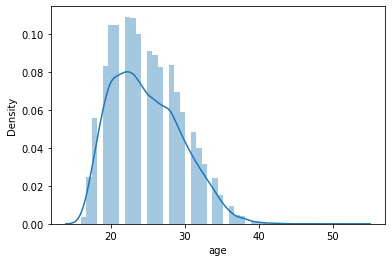

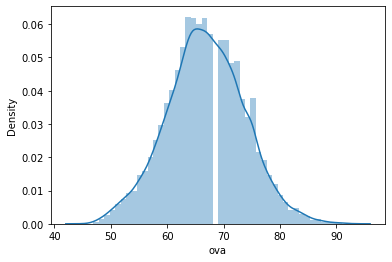

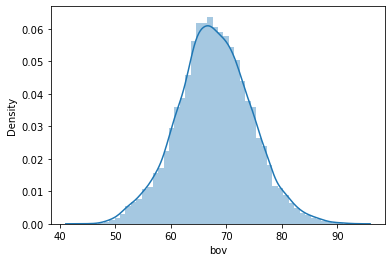

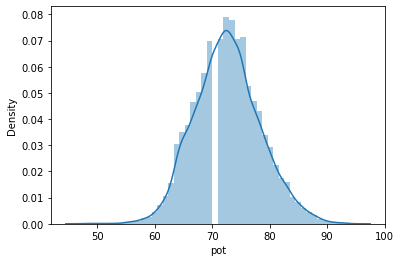

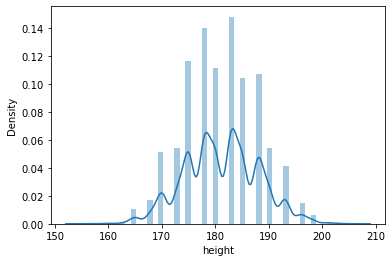

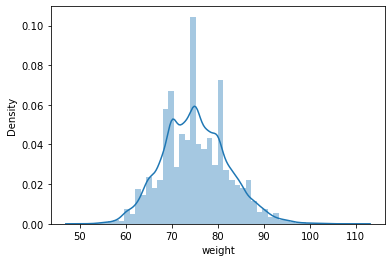

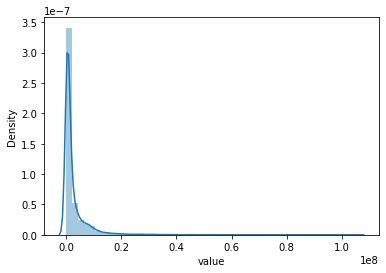

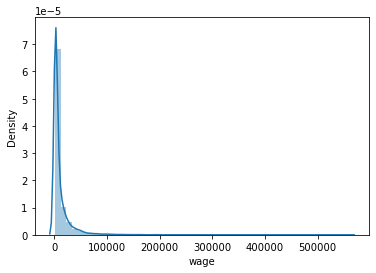

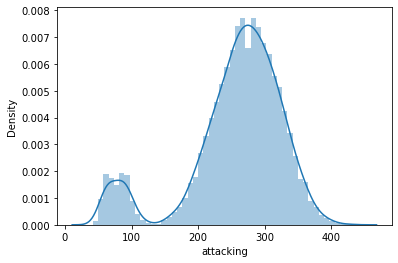

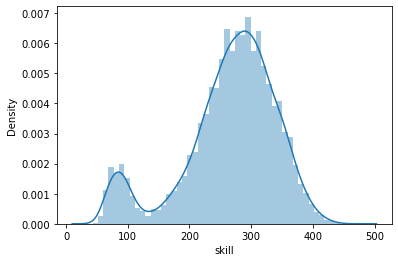

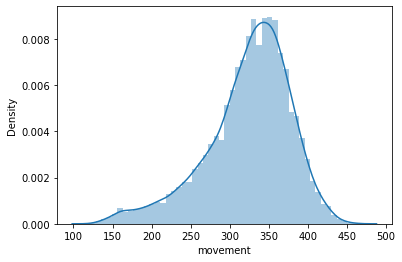

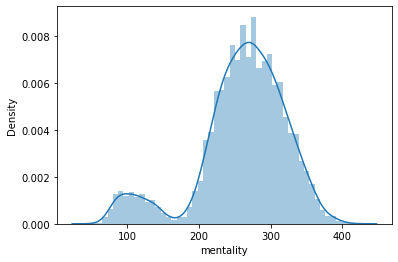

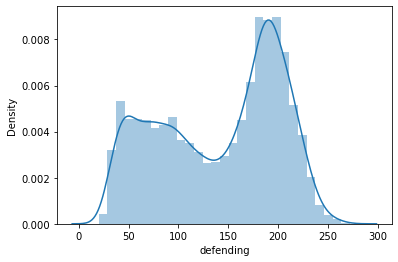

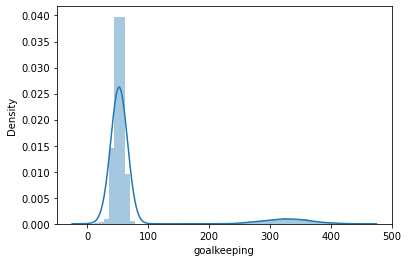

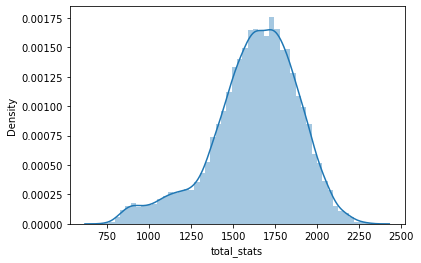

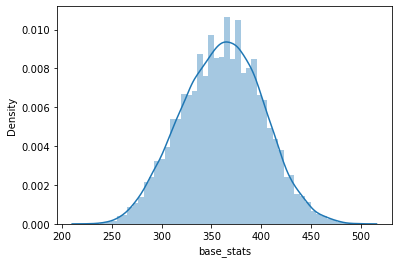

In [117]:
for column in df_clean.select_dtypes(np.number).columns:
    sns.distplot(df_clean[column])
    plt.show()

In [118]:
df_clean.corr(method='spearman')

age       ova       bov       pot    height    weight  \
age          1.000000  0.565296  0.506286 -0.272099  0.086736  0.242209   
ova          0.565296  1.000000  0.985373  0.532434  0.020726  0.138854   
bov          0.506286  0.985373  1.000000  0.572503  0.014699  0.125380   
pot         -0.272099  0.532434  0.572503  1.000000 -0.027445 -0.047627   
height       0.086736  0.020726  0.014699 -0.027445  1.000000  0.764639   
weight       0.242209  0.138854  0.125380 -0.047627  0.764639  1.000000   
value        0.334395  0.946406  0.955383  0.690633 -0.022486  0.065481   
wage         0.412162  0.766906  0.762895  0.431338  0.037606  0.104693   
attacking    0.336126  0.582912  0.600281  0.273331 -0.287233 -0.169799   
skill        0.276126  0.545846  0.564988  0.296738 -0.429179 -0.314590   
movement     0.036166  0.338940  0.358188  0.261365 -0.642920 -0.534187   
mentality    0.412310  0.627785  0.640528  0.269571 -0.233928 -0.116960   
defending    0.182322  0.318694  0.333629  0.171370 -0.020374  0.006807   
goalkeeping  0.203212  0.101839  0.068786 -0.063022  0.181038  0.191849   
total_stats  0.389098  0.681859  0.696874  0.328120 -0.333811 -0.200764   
base_stats   0.477226  0.826765  0.821651  0.423766 -0.130109 -0.004125   

                value      wage  attacking     skill  movement  mentality  \
age          0.334395  0.412162   0.336126  0.276126  0.036166   0.412310   
ova          0.946406  0.766906   0.582912  0.545846  0.338940   0.627785   
bov          0.955383  0.762895   0.600281  0.564988  0.358188   0.640528   
pot          0.690633  0.431338   0.273331  0.296738  0.261365   0.269571   
height      -0.022486  0.037606  -0.287233 -0.429179 -0.642920  -0.233928   
weight       0.065481  0.104693  -0.169799 -0.314590 -0.534187  -0.116960   
value        1.000000  0.744976   0.594266  0.564440  0.414188   0.602819   
wage         0.744976  1.000000   0.495055  0.457229  0.271620   0.513919   
attacking    0.594266  0.495055   1.000000  0.865901  0.609039   0.784996   
skill        0.564440  0.457229   0.865901  1.000000  0.663464   0.805993   
movement     0.414188  0.271620   0.609039  0.663464  1.000000   0.486282   
mentality    0.602819  0.513919   0.784996  0.805993  0.486282   1.000000   
defending    0.298601  0.258741   0.140657  0.262783  0.078977   0.532851   
goalkeeping  0.029871  0.058024  -0.172333 -0.187594 -0.209471  -0.152628   
total_stats  0.677078  0.554520   0.862190  0.903546  0.661469   0.934567   
base_stats   0.787385  0.633927   0.625246  0.657787  0.496057   0.706297   

             defending  goalkeeping  total_stats  base_stats  
age           0.182322     0.203212     0.389098    0.477226  
ova           0.318694     0.101839     0.681859    0.826765  
bov           0.333629     0.068786     0.696874    0.821651  
pot           0.171370    -0.063022     0.328120    0.423766  
height       -0.020374     0.181038    -0.333811   -0.130109  
weight        0.006807     0.191849    -0.200764   -0.004125  
value         0.298601     0.029871     0.677078    0.787385  
wage          0.258741     0.058024     0.554520    0.633927  
attacking     0.140657    -0.172333     0.862190    0.625246  
skill         0.262783    -0.187594     0.903546    0.657787  
movement      0.078977    -0.209471     0.661469    0.496057  
mentality     0.532851    -0.152628     0.934567    0.706297  
defending     1.000000    -0.204858     0.474356    0.256017  
goalkeeping  -0.204858     1.000000    -0.131844    0.115601  
total_stats   0.474356    -0.131844     1.000000    0.795650  
base_stats    0.256017     0.115601     0.795650    1.000000

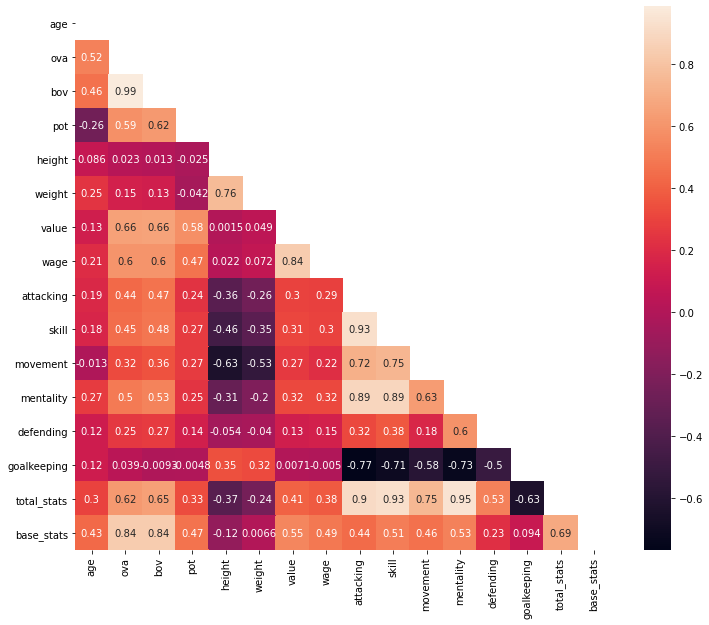

In [119]:
mask = np.zeros_like(df_clean.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_clean.corr(), mask=mask, annot=True)
plt.show()

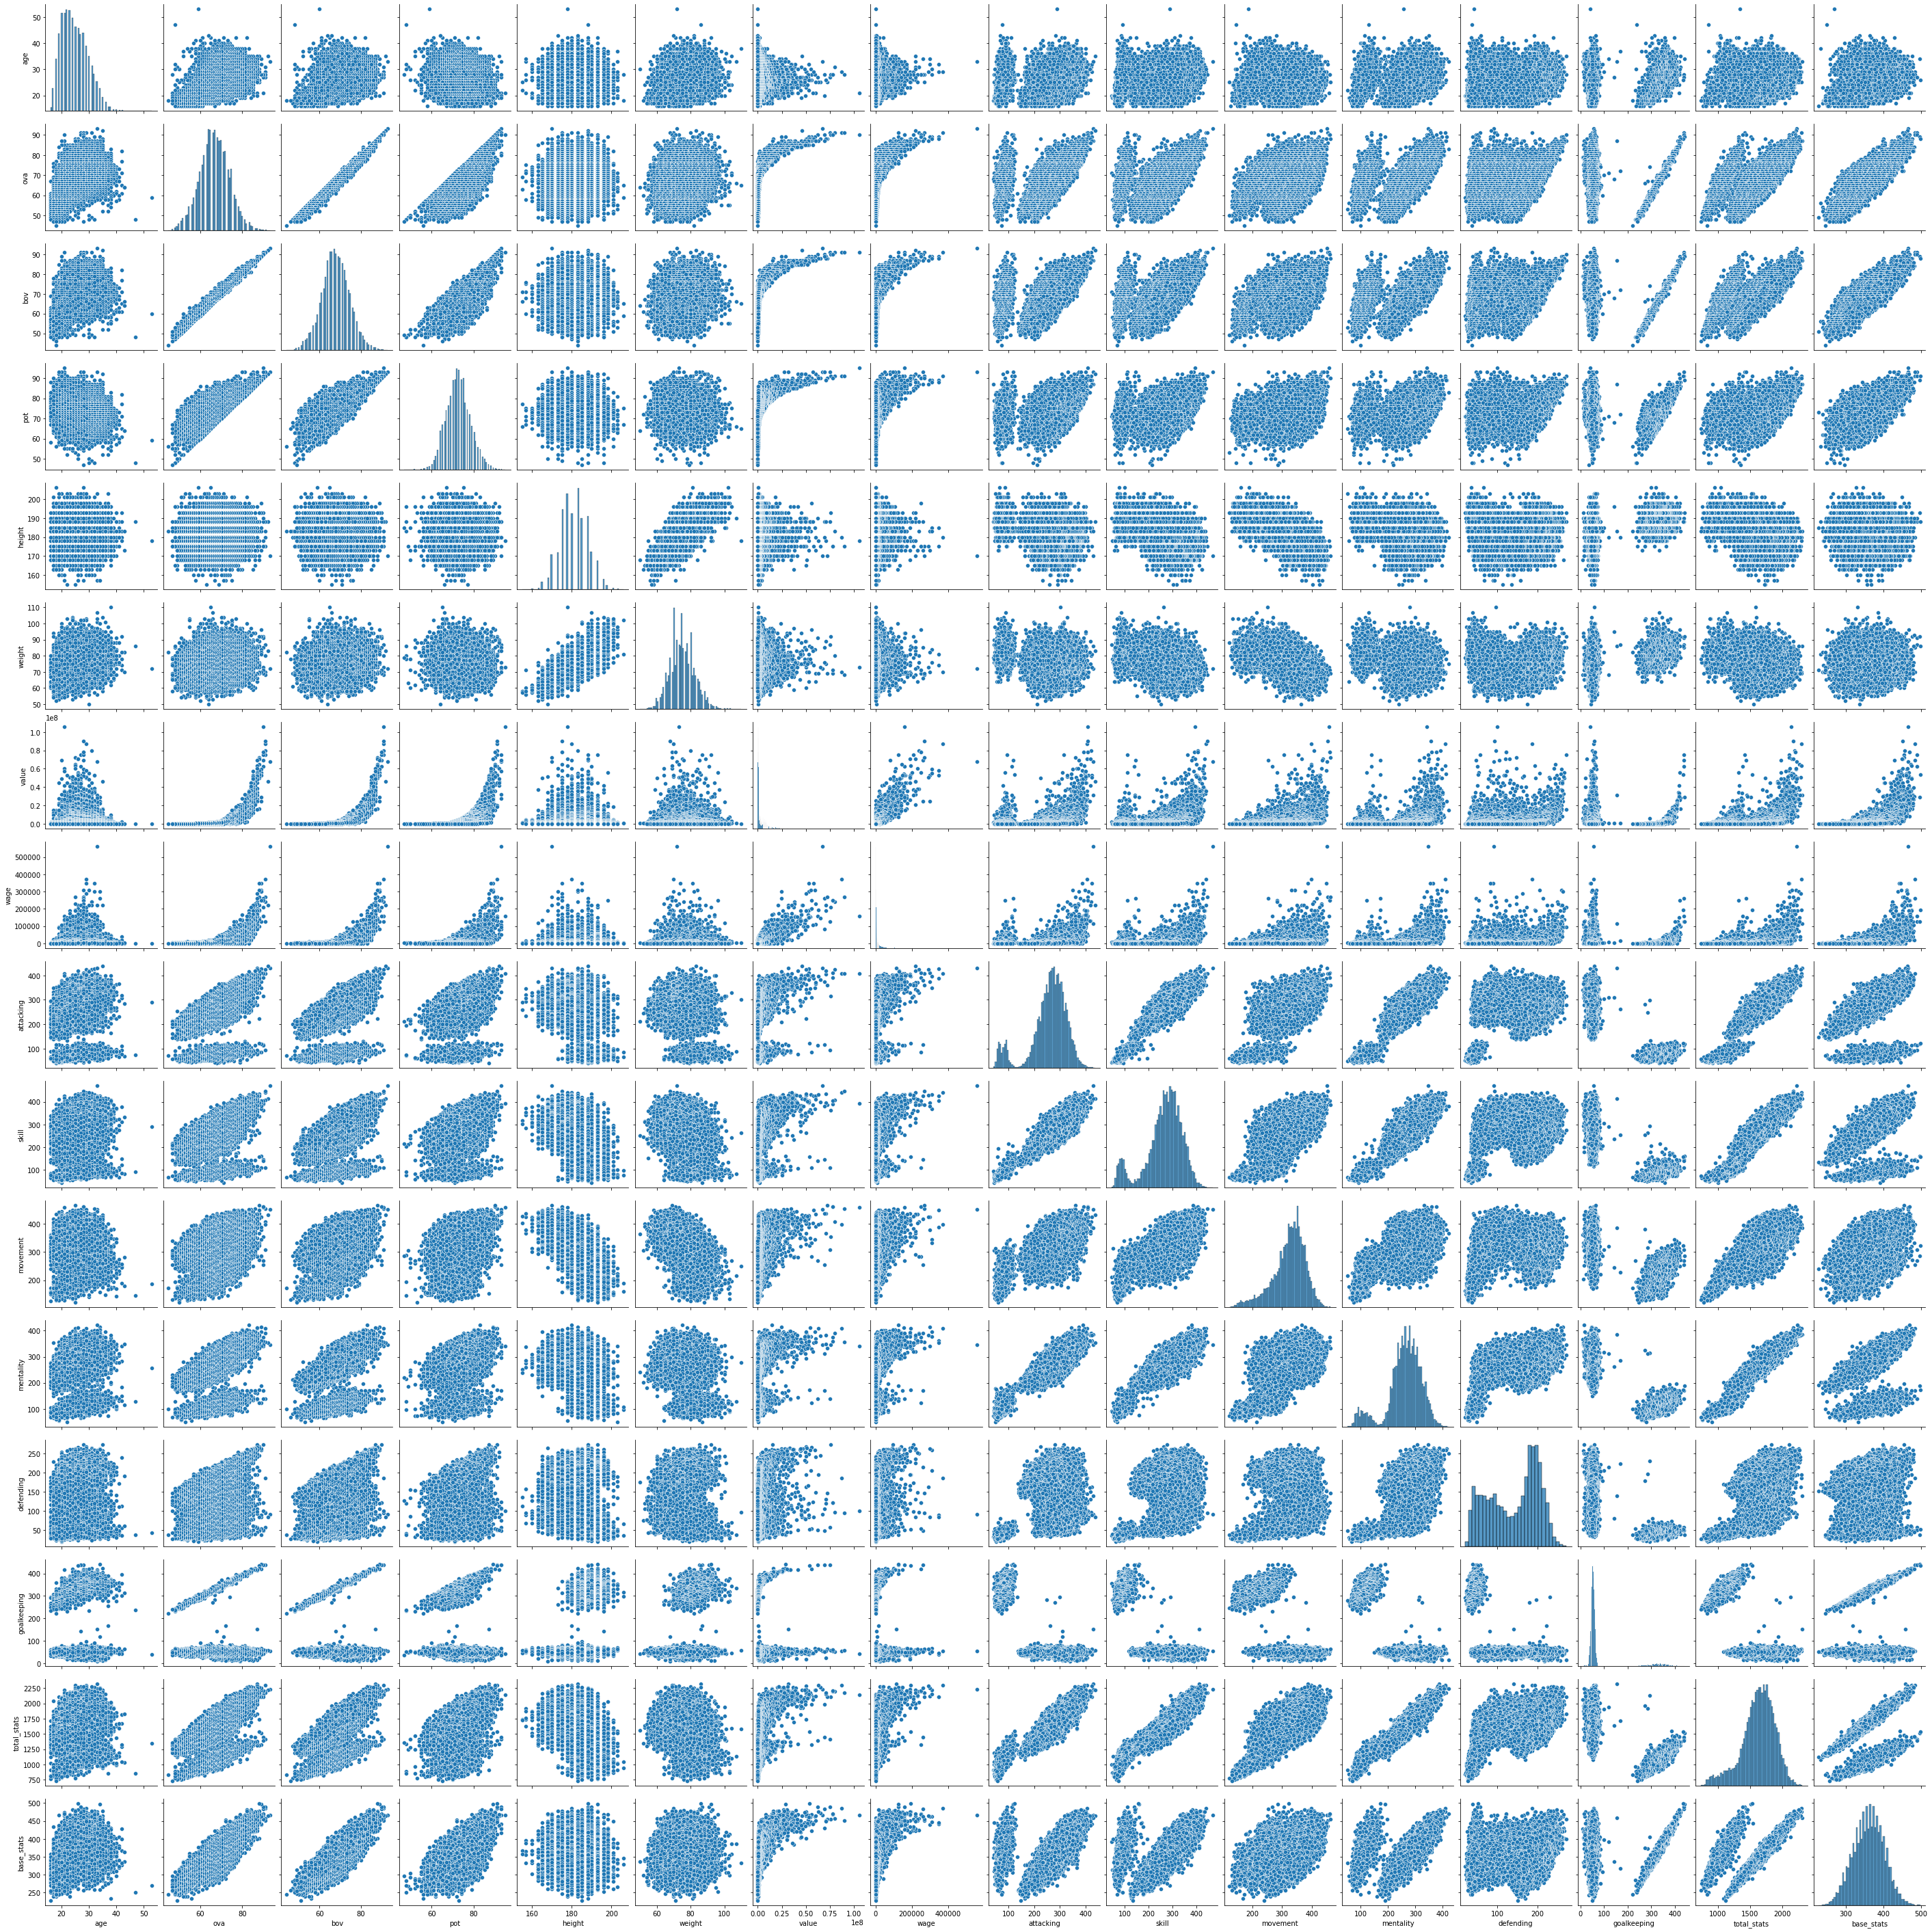

In [120]:
sns.pairplot(df_clean)

# Linear regression (raw data)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [165]:
df_clean.head(10)

age  ova  nationality                 club  bov   bp  pot  \
name                                                                           
L. Messi            33   93    Argentina         FC Barcelona   93   RW   93   
Cristiano Ronaldo   35   92     Portugal             Juventus   92   ST   92   
R. Lewandowski      31   91       Poland    FC Bayern München   91   ST   91   
K. De Bruyne        29   91      Belgium      Manchester City   91  CAM   91   
J. Oblak            27   91     Slovenia      Atlético Madrid   91   GK   93   
Neymar Jr           28   91       Brazil  Paris Saint-Germain   91   LW   91   
S. Mané             28   90      Senegal            Liverpool   90   LW   90   
K. Mbappé           21   90       France  Paris Saint-Germain   91   ST   95   
V. van Dijk         28   90  Netherlands            Liverpool   90   CB   91   
M. ter Stegen       28   90      Germany         FC Barcelona   90   GK   93   

                   height  weight   foot        value      wage  attacking  \
name                                                                         
L. Messi            170.0    72.0   Left   67500000.0  560000.0        429   
Cristiano Ronaldo   188.0    83.0  Right   46000000.0  220000.0        437   
R. Lewandowski      183.0    80.0  Right   80000000.0  240000.0        423   
K. De Bruyne        180.0    70.0  Right   87000000.0  370000.0        407   
J. Oblak            188.0    87.0  Right   75000000.0  125000.0         95   
Neymar Jr           175.0    68.0  Right   90000000.0  270000.0        408   
S. Mané             175.0    69.0  Right   78000000.0  250000.0        410   
K. Mbappé           178.0    73.0  Right  105500000.0  160000.0        408   
V. van Dijk         193.0    92.0  Right   75500000.0  210000.0        316   
M. ter Stegen       188.0    85.0  Right   69500000.0  260000.0        118   

                   skill  movement  mentality  defending  goalkeeping  \
name                                                                    
L. Messi             470       451        347         91           54   
Cristiano Ronaldo    414       431        353         84           58   
R. Lewandowski       407       407        391         96           51   
K. De Bruyne         441       398        408        186           56   
J. Oblak             109       307        140         57          437   
Neymar Jr            448       453        356         94           59   
S. Mané              391       460        358        122           56   
K. Mbappé            394       458        341        100           42   
V. van Dijk          363       354        347        272           58   
M. ter Stegen        144       254        171         48          439   

                   total_stats  base_stats  
name                                        
L. Messi                  2231         466  
Cristiano Ronaldo         2221         464  
R. Lewandowski            2195         457  
K. De Bruyne              2304         485  
J. Oblak                  1413         489  
Neymar Jr                 2175         451  
S. Mané                   2203         469  
K. Mbappé                 2147         466  
V. van Dijk               2112         455  
M. ter Stegen             1442         484

In [166]:
y1 = df_clean['ova'] #label
X1 = df_clean.drop(['ova'], axis=1) #features

In [167]:
X1_num = X1.select_dtypes(include = np.number)
X1_cat = X1.select_dtypes(exclude = np.number) 

In [168]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X1_cat)

OneHotEncoder(drop='first')

In [169]:
encoded1 = encoder.transform(X1_cat).toarray()
encoded1.shape

(15670, 1015)

In [170]:
X1_num.shape

(15670, 15)

In [171]:
X = np.concatenate([X1_num, encoded1], axis=1)
X.shape

(15670, 1030)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=42)

In [173]:
model = LinearRegression()

In [174]:
model.fit(X_train,y_train)

LinearRegression()

In [175]:
predictions = model.predict(X_test)
predictions.shape

(3918,)

In [176]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9851521269035497, 0.8360142655465614, 0.6989198521973565)

In [177]:
# This result was ridicously accurate

In [178]:
import statsmodels.api as sm

In [179]:
X = sm.add_constant(X)
model = sm.OLS(y1,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ova   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1112.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:46:07   Log-Likelihood:                -18186.
No. Observations:               15670   AIC:                         3.843e+04
Df Residuals:                   14639   BIC:                         4.633e+04
Df Model:                        1030                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8710      0.707     -5.479      0.0

In [181]:
lm = LinearRegression() # start the model object
model = lm.fit(X,y1) # fit your regression line / train the model
print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficient: [4.63463458e-09 1.76451599e-01 8.96334523e-01 ... 1.00086610e+00
 1.93911811e-01 1.29437680e-02]
Intercept: -3.8709570963980156


In [182]:
predictions = lm.predict(X) # predict some values
rmse = mean_squared_error(y1, predictions, squared=False) # or mse with squared=True
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target
print("R2_score:", round(lm.score(X,y1),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)

R2_score: 0.99
RMSE: 0.7723234323584522


## Too much multicolinearity. Let's shorten the criteria

In [235]:
df_short1 = df5[['age', 'ova', 'nationality', 'club', 'bov', 'bp', 'pot', 'height', 'weight', 'foot', 
'value', 'wage', 'total_stats', 'base_stats']]

In [236]:
df_short1.describe().apply(lambda x: round(x,3))

age        ova        bov        pot     height     weight  \
count  15670.000  15670.000  15670.000  15670.000  15670.000  15670.000   
mean      24.878     66.797     67.806     72.611    181.163     75.044   
std        4.698      6.877      6.659      5.726      6.844      7.121   
min       16.000     45.000     44.000     47.000    155.000     50.000   
25%       21.000     62.000     64.000     69.000    175.000     70.000   
50%       24.000     67.000     68.000     72.000    180.000     75.000   
75%       28.000     71.000     72.000     76.000    185.000     80.000   
max       53.000     93.000     93.000     95.000    206.000    110.000   

              value        wage  total_stats  base_stats  
count  1.567000e+04   15670.000    15670.000   15670.000  
mean   2.698619e+06   10549.812     1628.497     360.828  
std    5.541803e+06   21383.065      260.100      40.477  
min    0.000000e+00     500.000      731.000     228.000  
25%    4.000000e+05    1000.000     1489.000     332.000  
50%    8.500000e+05    3000.000     1655.000     362.000  
75%    2.600000e+06   11000.000     1809.000     389.000  
max    1.055000e+08  560000.000     2316.000     498.000

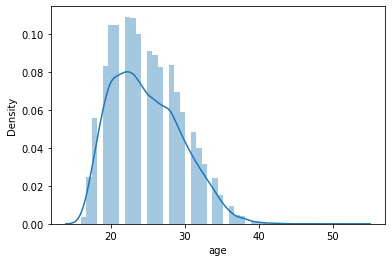

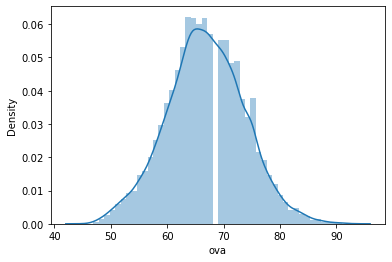

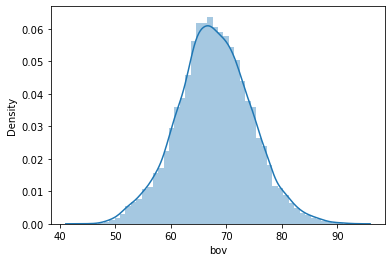

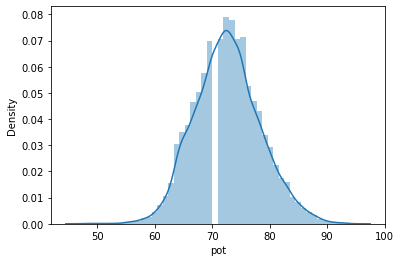

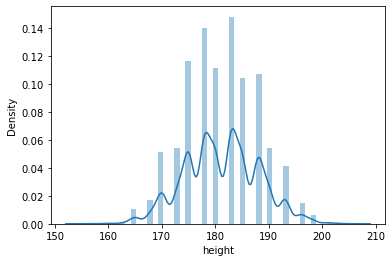

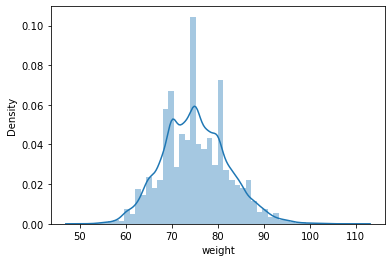

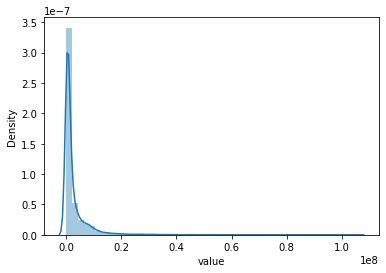

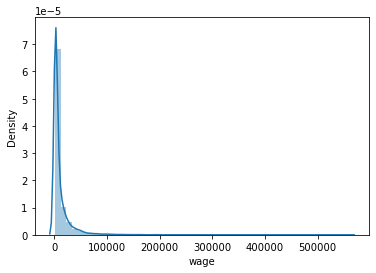

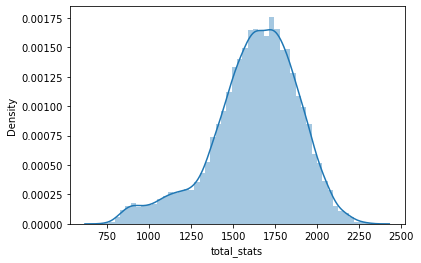

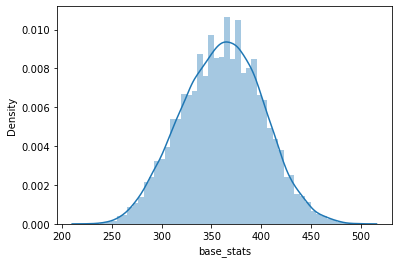

In [237]:
for column in df_short1.select_dtypes(np.number).columns:
    sns.distplot(df_short1[column])
    plt.show()

In [238]:
df_clean.corr(method='spearman')

age       ova       bov       pot    height    weight  \
age          1.000000  0.565296  0.506286 -0.272099  0.086736  0.242209   
ova          0.565296  1.000000  0.985373  0.532434  0.020726  0.138854   
bov          0.506286  0.985373  1.000000  0.572503  0.014699  0.125380   
pot         -0.272099  0.532434  0.572503  1.000000 -0.027445 -0.047627   
height       0.086736  0.020726  0.014699 -0.027445  1.000000  0.764639   
weight       0.242209  0.138854  0.125380 -0.047627  0.764639  1.000000   
value        0.334395  0.946406  0.955383  0.690633 -0.022486  0.065481   
wage         0.412162  0.766906  0.762895  0.431338  0.037606  0.104693   
attacking    0.336126  0.582912  0.600281  0.273331 -0.287233 -0.169799   
skill        0.276126  0.545846  0.564988  0.296738 -0.429179 -0.314590   
movement     0.036166  0.338940  0.358188  0.261365 -0.642920 -0.534187   
mentality    0.412310  0.627785  0.640528  0.269571 -0.233928 -0.116960   
defending    0.182322  0.318694  0.333629  0.171370 -0.020374  0.006807   
goalkeeping  0.203212  0.101839  0.068786 -0.063022  0.181038  0.191849   
total_stats  0.389098  0.681859  0.696874  0.328120 -0.333811 -0.200764   
base_stats   0.477226  0.826765  0.821651  0.423766 -0.130109 -0.004125   

                value      wage  attacking     skill  movement  mentality  \
age          0.334395  0.412162   0.336126  0.276126  0.036166   0.412310   
ova          0.946406  0.766906   0.582912  0.545846  0.338940   0.627785   
bov          0.955383  0.762895   0.600281  0.564988  0.358188   0.640528   
pot          0.690633  0.431338   0.273331  0.296738  0.261365   0.269571   
height      -0.022486  0.037606  -0.287233 -0.429179 -0.642920  -0.233928   
weight       0.065481  0.104693  -0.169799 -0.314590 -0.534187  -0.116960   
value        1.000000  0.744976   0.594266  0.564440  0.414188   0.602819   
wage         0.744976  1.000000   0.495055  0.457229  0.271620   0.513919   
attacking    0.594266  0.495055   1.000000  0.865901  0.609039   0.784996   
skill        0.564440  0.457229   0.865901  1.000000  0.663464   0.805993   
movement     0.414188  0.271620   0.609039  0.663464  1.000000   0.486282   
mentality    0.602819  0.513919   0.784996  0.805993  0.486282   1.000000   
defending    0.298601  0.258741   0.140657  0.262783  0.078977   0.532851   
goalkeeping  0.029871  0.058024  -0.172333 -0.187594 -0.209471  -0.152628   
total_stats  0.677078  0.554520   0.862190  0.903546  0.661469   0.934567   
base_stats   0.787385  0.633927   0.625246  0.657787  0.496057   0.706297   

             defending  goalkeeping  total_stats  base_stats  
age           0.182322     0.203212     0.389098    0.477226  
ova           0.318694     0.101839     0.681859    0.826765  
bov           0.333629     0.068786     0.696874    0.821651  
pot           0.171370    -0.063022     0.328120    0.423766  
height       -0.020374     0.181038    -0.333811   -0.130109  
weight        0.006807     0.191849    -0.200764   -0.004125  
value         0.298601     0.029871     0.677078    0.787385  
wage          0.258741     0.058024     0.554520    0.633927  
attacking     0.140657    -0.172333     0.862190    0.625246  
skill         0.262783    -0.187594     0.903546    0.657787  
movement      0.078977    -0.209471     0.661469    0.496057  
mentality     0.532851    -0.152628     0.934567    0.706297  
defending     1.000000    -0.204858     0.474356    0.256017  
goalkeeping  -0.204858     1.000000    -0.131844    0.115601  
total_stats   0.474356    -0.131844     1.000000    0.795650  
base_stats    0.256017     0.115601     0.795650    1.000000

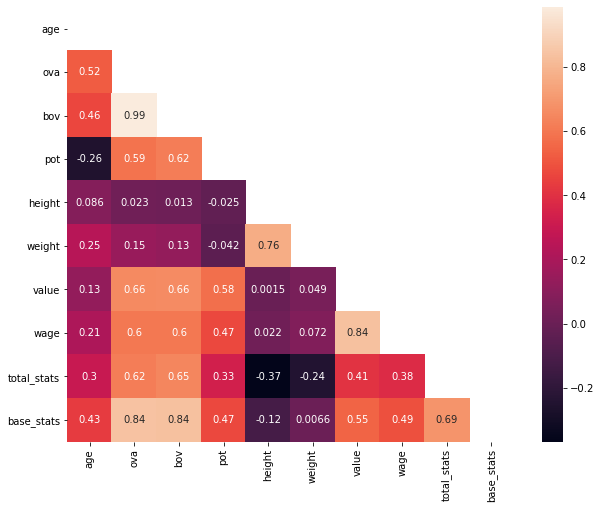

In [266]:
mask = np.zeros_like(df_short1.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_short1.corr(), mask=mask, annot=True).get_figure()  
ax.savefig('df_short1_heatmap', dpi=400)
plt.show()

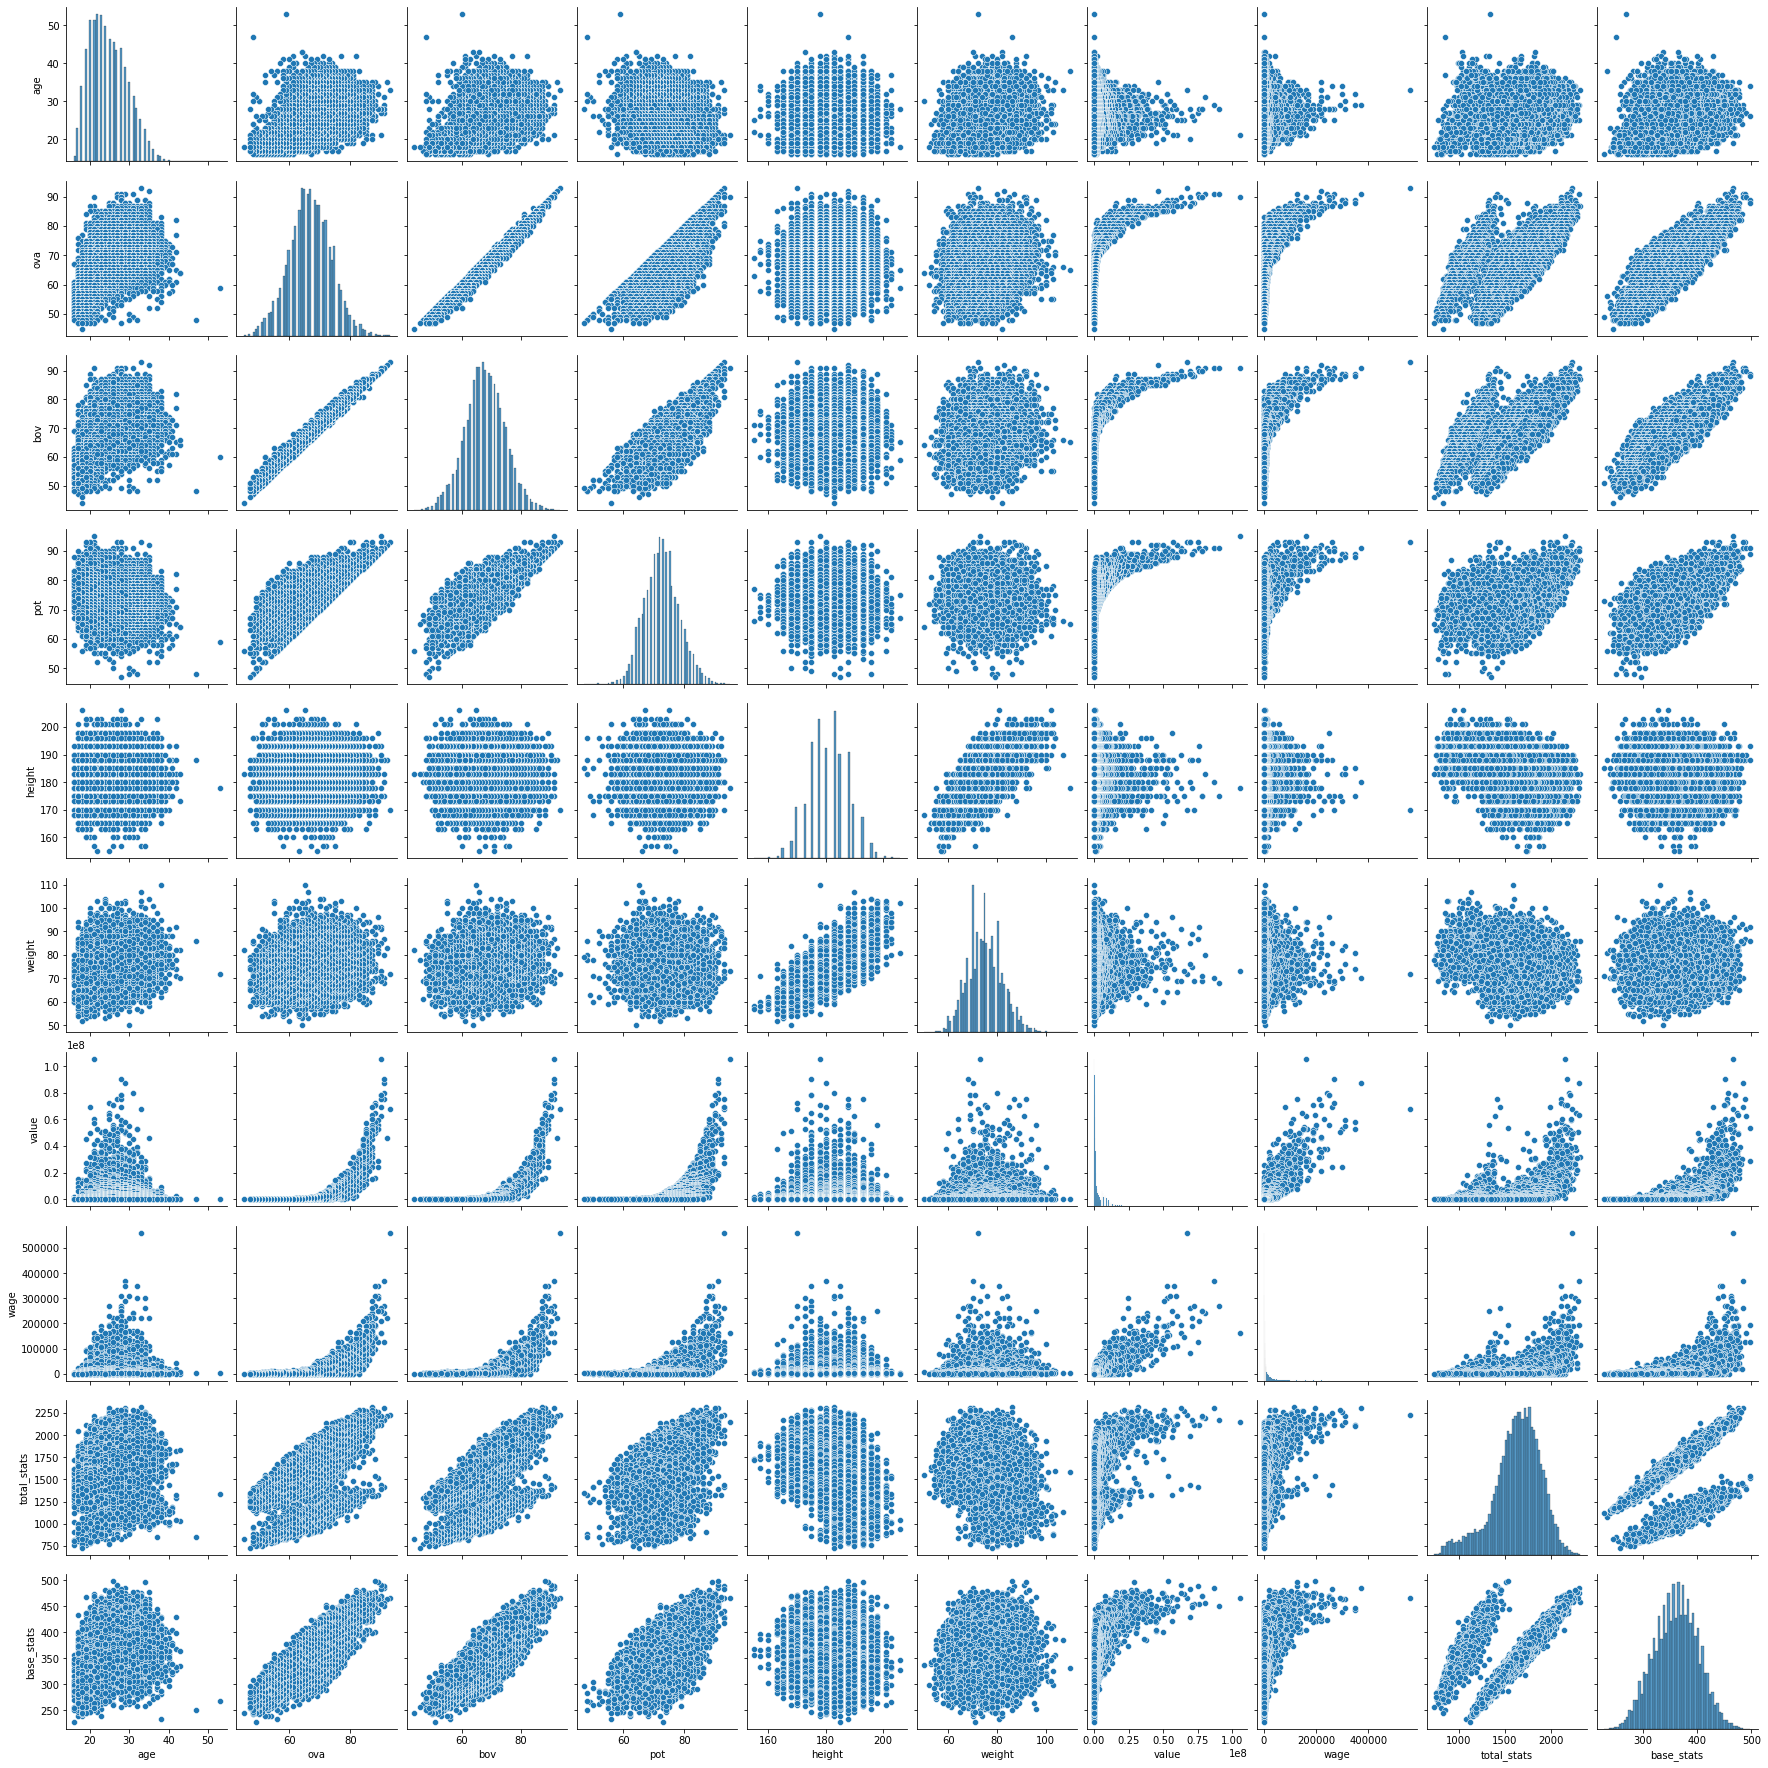

In [264]:
pairplot1 = sns.pairplot(df_short1)
plt.show()

In [241]:
y3 = df_short1['ova'] #label
X3 = df_short1.drop(['ova'], axis=1) #features

In [242]:
X3_num = X3.select_dtypes(include = np.number)
X3_cat = X3.select_dtypes(exclude = np.number) 

In [243]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X3_cat)

OneHotEncoder(drop='first')

In [244]:
encoded3 = encoder.transform(X3_cat).toarray()
encoded3.shape

(15670, 1015)

In [245]:
X3_num.shape

(15670, 9)

In [246]:
X = np.concatenate([X3_num, encoded3], axis=1)
X.shape

(15670, 1024)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.25, random_state=42)

In [248]:
model = LinearRegression()

In [249]:
model.fit(X_train,y_train)

LinearRegression()

In [250]:
predictions = model.predict(X_test)
predictions.shape

(3918,)

In [251]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9849870999603418, 0.8406473749581367, 0.706688009024006)

In [252]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.6256832078930866, 0.8406473749581367)

In [277]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results = results.sort_values(by=['true'], ascending=False)
results.head(10)

true       pred     resid
name                                    
L. Messi         93  94.934172  1.934172
K. De Bruyne     91  91.778450  0.778450
V. van Dijk      90  90.537657  0.537657
S. Agüero        89  89.651201  0.651201
M. Neuer         89  90.149798  1.149798
T. Kroos         88  88.721973  0.721973
S. Handanovič    88  89.330100  1.330100
J. Sancho        87  87.806319  0.806319
A. Laporte       87  87.550439  0.550439
C. Immobile      87  87.263651  0.263651

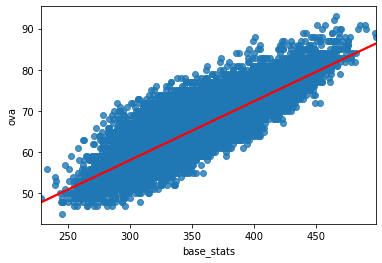

In [258]:
figure1 = sns.regplot(df_short1['base_stats'], y3, line_kws={"color": "red"}).get_figure()  
figure1.savefig('ova_base_stats', dpi=400)
plt.show()

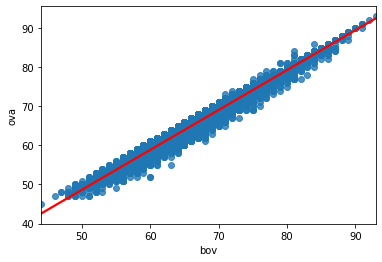

In [275]:
figure2 = sns.regplot(df_short1['bov'], y3, line_kws={"color": "red"}).get_figure()  
figure2.savefig('ova_bov', dpi=400)
plt.show()

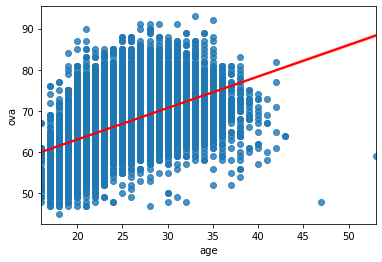

In [276]:
figure3 = sns.regplot(df_short1['age'], y3, line_kws={"color": "red"}).get_figure()  
figure3.savefig('ova_age', dpi=400)
plt.show()

<AxesSubplot:ylabel='ova'>

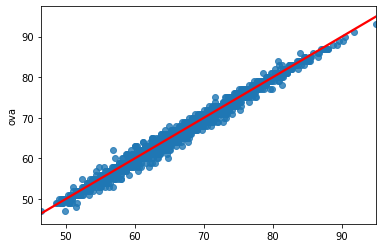

In [278]:
sns.regplot(predictions, y_test, line_kws={"color": "red"})